<a href="https://colab.research.google.com/github/mic0331/deep-learning-tensorflow-2/blob/master/TF2_0_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.0.0-beta1


In [0]:
# load the data
from sklearn.datasets import load_breast_cancer

In [0]:
# load the data
data = load_breast_cancer()

In [21]:
# check the type of `data` 
type(data)

sklearn.utils.Bunch

In [22]:
# note: it is a Bunch object
# this basically acts like a dictionary where you can treat the keys like attributes
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [23]:
# 'data' (the attribute) means the input data
data.data.shape
# it has 569 samples, 30 features

(569, 30)

In [24]:
# 'targets'
data.target
# note how the targets are just 0s and 1s
# normally, when you have K targets, they are labeled 0..K-1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [25]:
# their meaning is not lost
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [26]:
# there are also 569 corresponding targets
data.target.shape

(569,)

In [27]:
# you can also determine the meaning of each feature
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Train on 381 samples, validate on 188 samples
Epoch 1/100
381/381 [==============================] - 0s 674us/sample - loss: 1.5990 - accuracy: 0.2100 - val_loss: 1.4978 - val_accuracy: 0.1277
Epoch 2/100
381/381 [==============================] - 0s 76us/sample - loss: 1.4721 - accuracy: 0.2283 - val_loss: 1.3683 - val_accuracy: 0.1436
Epoch 3/100
381/381 [==============================] - 0s 74us/sample - loss: 1.3560 - accuracy: 0.2441 - val_loss: 1.2452 - val_accuracy: 0.1702
Epoch 4/100
381/381 [==============================] - 0s 97us/sample - loss: 1.2428 - accuracy: 0.2808 - val_loss: 1.1341 - val_accuracy: 0.2340
Epoch 5/100
381/381 [==============================] - 0s 71us/sample - loss: 1.1395 - accuracy: 0.3202 - val_loss: 1.0345 - val_accuracy: 0.3085
Epoch 6/100
381/381 [==============================] - 0s 73us/sample - loss: 1.0494 - accuracy: 0.3517 - val_loss: 0.9428 - val_accuracy: 0.3723
Epoch 7/100
381/381 [==============================] - 0s 73us/sample - loss:

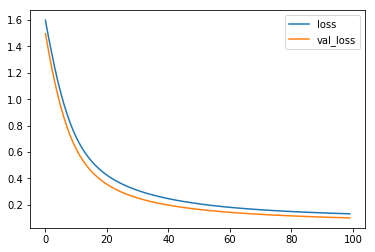

In [31]:
# Evaluate what's returned by model.fit()
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

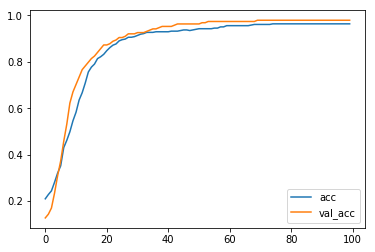

In [32]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# Part 2: Making Predictions

In [33]:
# Make predictions
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

[[9.95634675e-01]
 [8.53578269e-01]
 [9.80750263e-01]
 [1.04948878e-03]
 [9.97470200e-01]
 [7.13147938e-01]
 [9.97585893e-01]
 [9.70178843e-01]
 [1.88648701e-05]
 [5.73891401e-03]
 [9.30439472e-01]
 [9.95398462e-01]
 [9.97705102e-01]
 [9.79681134e-01]
 [1.55568123e-04]
 [9.93834019e-01]
 [4.24754322e-01]
 [9.94263887e-01]
 [8.18398654e-01]
 [9.97120380e-01]
 [9.61253762e-01]
 [9.64709520e-02]
 [1.45212412e-02]
 [2.10094452e-03]
 [9.89977598e-01]
 [9.12945628e-01]
 [4.10071015e-03]
 [9.92980361e-01]
 [1.10828876e-01]
 [1.66952014e-02]
 [8.87334347e-03]
 [5.04116416e-02]
 [2.96184421e-03]
 [1.31531477e-01]
 [9.79008198e-01]
 [9.89788651e-01]
 [9.59603786e-01]
 [9.98583615e-01]
 [9.68000531e-01]
 [2.15241224e-01]
 [9.84939694e-01]
 [4.38004732e-04]
 [1.27042711e-01]
 [9.76552248e-01]
 [6.30170107e-03]
 [4.19488549e-03]
 [8.80793512e-01]
 [9.48599339e-01]
 [9.95938778e-01]
 [1.10763609e-01]
 [7.22929120e-01]
 [9.86760497e-01]
 [9.72992539e-01]
 [9.94665325e-01]
 [9.33727920e-01]
 [1.516877

In [34]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1.
 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1.]


In [35]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9787234042553191
188/188 [==============================] - 0s 95us/sample - loss: 0.1004 - accuracy: 0.9787
Evaluate output: [0.1004109855027909, 0.9787234]


# Part 3: Saving and Loading a Model

In [0]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [37]:
# check that the model file exists
!ls -lh

total 580K
-rw-r--r-- 1 root root 393K Apr  1  1998 arrhythmia.data
-rw-r--r-- 1 root root   76 Aug 16 11:21 fake_util.py
drwx------ 3 root root 4.0K Aug 16 11:34 gdrive
-rw-r--r-- 1 root root  19K Aug 16 13:29 linearclassifier.h5
-rw-r--r-- 1 root root 2.3K Aug 16 12:35 moore.csv
-rw-r--r-- 1 root root 2.3K Aug 16 13:19 moore.csv.1
drwxr-xr-x 2 root root 4.0K Aug 16 11:21 __pycache__
drwxr-xr-x 1 root root 4.0K Aug  2 16:06 sample_data
-rw-r--r-- 1 root root 137K Aug 16 11:19 wrong_fitments.csv


In [38]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

ValueError: ignored

In [40]:
# Download the file - requires Chrome (at this point)
from google.colab import files
files.download('linearclassifier.h5')

MessageError: ignored